In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import itertools
import plotly.plotly as py
import os

plt.style.use('ggplot')

In [24]:
direc = os.getcwd()

'C:\\Users\\Rob\\Documents\\GitHub\\data'

In [23]:
os.chdir(direc)

In [3]:
#country names un Sub-Saharan Africa
#'Sub-Saharan Africa',
 #'Sub-Saharan Africa (excluding high income)',
 #'Sub-Saharan Africa (IDA & IBRD countries)'
#SN.ITK.DEFC.ZS <- indicator code undernourishment

In [14]:
df_wdi = pd.read_csv("WDI/WDIData.csv")
#We only want the indicator with the % of undernourishment
df_wdi = df_wdi[df_wdi["Indicator Code"] == 'SN.ITK.DEFC.ZS']
# Set the years from colums to rows
df_wdi = pd.melt(df_wdi,id_vars =["Country Name","Country Code","Indicator Name","Indicator Code"],
          var_name = "Years", value_name = "perc. undernourishment")
# Sort the values first by Country Name and than by Years
df_wdi = df_wdi.sort_values(["Country Name", "Years"])

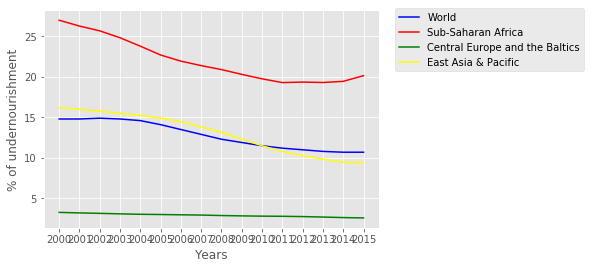

In [15]:
#create plot of undernourishment
x = df_wdi[df_wdi["Country Name"] == 'World']["Years"]
y1 = df_wdi[df_wdi["Country Name"] == 'World']["perc. undernourishment"]
y2 = df_wdi[df_wdi["Country Name"] == 'Sub-Saharan Africa']["perc. undernourishment"]
y3 = df_wdi[df_wdi["Country Name"] == 'Central Europe and the Baltics']["perc. undernourishment"]
y4 = df_wdi[df_wdi["Country Name"] == 'East Asia & Pacific']["perc. undernourishment"]

plt.plot(x,y1, color = "Blue",label = "World")
plt.plot(x,y2, color = "Red",label = "Sub-Saharan Africa")
plt.plot(x,y3, color = "Green",label = "Central Europe and the Baltics")
plt.plot(x,y4, color = "Yellow",label = "East Asia & Pacific")
plt.xlabel("Years")
plt.ylabel("% of undernourishment")

plt.legend(loc=((1.05,0.72)))
plt.show()

In [16]:
#create right dataset for Cereal Yield
df_wdi2 = pd.read_csv("WDI/WDIData.csv")
#We only want the indicator with Cereal Yield
df_wdi2 = df_wdi2[df_wdi2["Indicator Code"] == 'AG.YLD.CREL.KG']
# Set the years from colums to rows
df_wdi2 = pd.melt(df_wdi2,id_vars =["Country Name","Country Code","Indicator Name","Indicator Code"],
              var_name = "Years", value_name = "Cereal Yield (kg per Hectare)")
# Sort the values first by Country Name and than by Years
df_wdi2 = df_wdi2.sort_values(["Country Name","Years"])

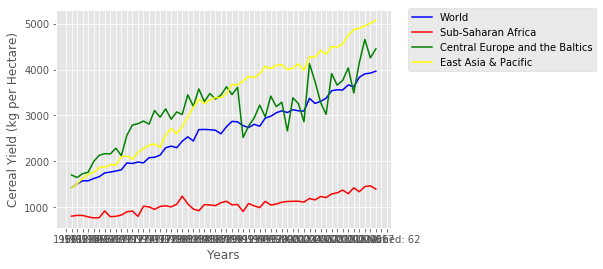

In [17]:
x = df_wdi2[df_wdi2["Country Name"] == 'World']["Years"]
y1 = df_wdi2[df_wdi2["Country Name"] == 'World']["Cereal Yield (kg per Hectare)"]
y2 = df_wdi2[df_wdi2["Country Name"] == 'Sub-Saharan Africa']["Cereal Yield (kg per Hectare)"]
y3 = df_wdi2[df_wdi2["Country Name"] == 'Central Europe and the Baltics']["Cereal Yield (kg per Hectare)"]
y4 = df_wdi2[df_wdi2["Country Name"] == 'East Asia & Pacific']["Cereal Yield (kg per Hectare)"]

plt.plot(x,y1, color = "Blue",label = "World")
plt.plot(x,y2, color = "Red",label = "Sub-Saharan Africa")
plt.plot(x,y3, color = "Green",label = "Central Europe and the Baltics")
plt.plot(x,y4, color = "Yellow",label = "East Asia & Pacific")
plt.xlabel("Years")
plt.ylabel("Cereal Yield (kg per Hectare)")

plt.legend(loc=((1.05,0.72)))
plt.show()

In [21]:
dfc = pd.read_csv("countriescodes.csv", sep = ",", encoding = 'latin-1')
dfc = dfc[dfc['sub-region'] == "Sub-Saharan Africa"]["alpha-3"]
df = df_wdi[df_wdi["Country Code"].isin(dfc)]
df = df[df["Years"] == "2015"]

scl = [[0.0, 'rgb(255,127,80)'],[0.2, 'rgb(255,99,71)'],[0.4, 'rgb(255,0,0)'],\
            [0.6, 'rgb(220,20,60)'],[1, 'rgb(178,34,34)']]

df['text'] = df['Country Name']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['Country Code'],
        z = df['perc. undernourishment'],
        locationmode = 'ISO-3',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 1
            ) ),
        colorbar = dict(
            title = "% Undernourishment")
        ) ]

layout = dict(
        title = 'Undernourishment in Sub-Saharan Africa (2016)',
        geo = dict(
            scope='africa',
            showlakes = True,
            lakecolor = 'rgb(135,206,235)',
            showland = True,
            landcolor = 'rgb(220,220,220)')
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )